In [1]:

# US Traffic Accident Analysis – US_Accidents_March23
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN



In [2]:

# Then import it
import folium

In [3]:
# 1. Load & Sample Data
df = pd.read_csv('US_Accidents_March23.csv')
df.dropna(subset=['Start_Lat', 'Start_Lng', 'Weather_Condition'], inplace=True)
df_sample = df.sample(n=200000, random_state=42)  # manageable for mapping

In [5]:
# 2. Convert time columns
df_sample['Start_Time'] = pd.to_datetime(df_sample['Start_Time'], errors='coerce')

df_sample['Hour'] = df_sample['Start_Time'].dt.hour
df_sample['DayOfWeek'] = df_sample['Start_Time'].dt.dayofweek  # 0=Monday

In [6]:
# 3. EDA: Road Conditions, Weather, Time of Day
for col in ['Weather_Condition', 'Sunrise_Sunset', 'City']:
    print(df_sample[col].value_counts().head())

Weather_Condition
Fair             68246
Mostly Cloudy    26843
Cloudy           21410
Clear            21200
Partly Cloudy    18431
Name: count, dtype: int64
Sunrise_Sunset
Day      138451
Night     60980
Name: count, dtype: int64
City
Miami          5049
Houston        4375
Los Angeles    4163
Charlotte      3683
Dallas         3464
Name: count, dtype: int64


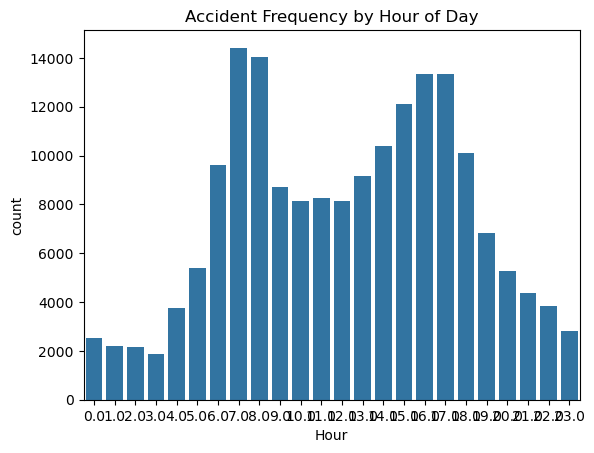

In [7]:

# Plot accidents by hour
sns.countplot(data=df_sample, x='Hour')
plt.title('Accident Frequency by Hour of Day')
plt.show()



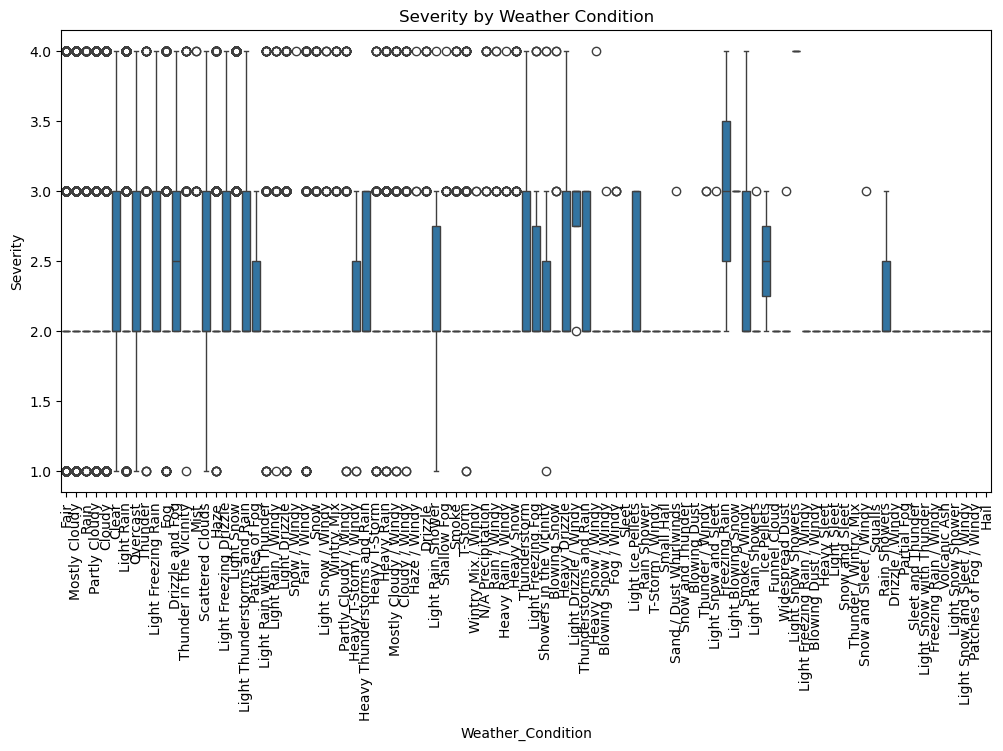

In [8]:
# Weather vs Severity
plt.figure(figsize=(12,6))
sns.boxplot(data=df_sample, x='Weather_Condition', y='Severity')
plt.xticks(rotation=90)
plt.title('Severity by Weather Condition')
plt.show()


In [9]:
# 4. Spatial Clustering for Hotspots using DBSCAN
coords = df_sample[['Start_Lat', 'Start_Lng']].to_numpy()
db = DBSCAN(eps=0.01, min_samples=20).fit(coords)
df_sample['cluster'] = db.labels_

In [10]:
# 5. Visualize top hotspot clusters on map
hotspots = df_sample[df_sample['cluster'] >= 0]
map_center = [hotspots['Start_Lat'].mean(), hotspots['Start_Lng'].mean()]
m = folium.Map(location=map_center, zoom_start=6)

for _, row in hotspots.sample(n=500, random_state=1).iterrows():
    folium.CircleMarker(
        location=(row.Start_Lat, row.Start_Lng),
        radius=2, color='red', fill=True, fill_opacity=0.5
    ).add_to(m)

m  # Render interactive map

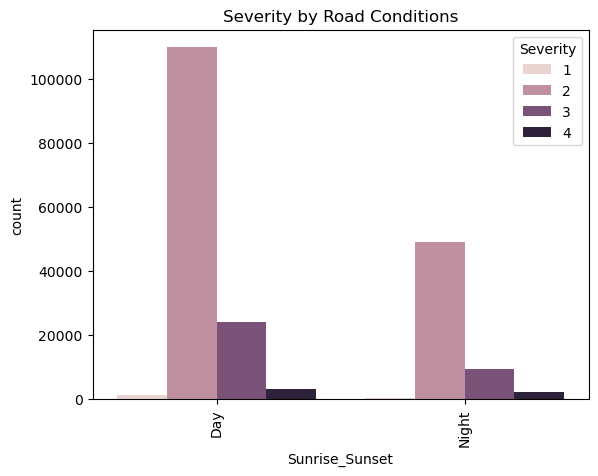

In [12]:
# 6. Additional insights: Weather & Road conditions
sns.countplot(data=df_sample, x='Sunrise_Sunset', hue='Severity')
plt.xticks(rotation=90)
plt.title('Severity by Road Conditions')
plt.show()